## Autoreload

In [16]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Importing libraries 


In [2]:
import pyreadr
import numpy as np
import pandas as pd
import bct

In [18]:
# Install an additional library called RVR. This will add an 
# extra model to your pools of models to be analysed
!pip install sklearn-rvm

## Importing datasets

In [19]:
# Import data
data1 = pyreadr.read_r('nspn.fmri.main.RData')
 
age=np.asarray(data1['age.main'])
#print(age.shape)

FC=np.asarray(data1['fc.main'])
FCNoNAN = np.nan_to_num(FC,copy=True,nan=1.5)
FCNoNAN_rs=np.reshape(FCNoNAN,[346,346,520],order='F')
MeanFC=np.mean(FCNoNAN_rs,axis=2)
MeanFC.shape

FCIndStrengths=np.mean(FCNoNAN_rs,axis=1)
#FCNoNAN_rs[:,:,3]
FCIndStrengths.shape

(346, 520)

In [20]:
from pathlib import Path
import numpy as np
from sklearn.datasets import load_boston


# Specify the pools of models to be used
# Note: this file needs to be on the same folder as this notebook
##<---- changed this
from tpot_config import config 

In [21]:
y = age.ravel()
X = FCIndStrengths.T

## Train/Test split

In [22]:
# Change this to import your data
import pyreadr
import numpy as np
from sklearn.model_selection import train_test_split
from tpot import TPOTRegressor

# Split training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.75, test_size=0.25, random_state=42)

In [23]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)    #putting the predicted values of y next to the real values obtained by the test set
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1)) 

[[10.72 21.87]
 [16.39 17.62]
 [18.17 18.35]
 [24.73 24.81]
 [16.29 16.78]
 [23.21 22.83]
 [15.28 25.42]
 [33.58 15.02]
 [22.84 24.49]
 [15.86 16.3 ]
 [23.17 20.26]
 [17.66 22.75]
 [ 9.67 14.94]
 [22.49 22.7 ]
 [14.65 17.11]
 [28.94 16.83]
 [19.18 17.02]
 [25.88 17.84]
 [21.6  24.01]
 [14.37 18.77]
 [18.17 22.17]
 [22.95 15.21]
 [ 6.95 15.78]
 [30.17 15.16]
 [17.2  18.05]
 [24.93 19.27]
 [10.85 17.81]
 [21.65 16.25]
 [29.19 25.51]
 [18.91 24.05]
 [25.57 15.37]
 [12.01 20.37]
 [17.59 20.09]
 [ 4.44 17.9 ]
 [16.81 16.82]
 [18.4  17.1 ]
 [15.55 24.77]
 [13.33 14.38]
 [19.4  16.59]
 [12.18 22.6 ]
 [15.93 21.73]
 [21.1  19.31]
 [17.76 18.  ]
 [19.72 21.84]
 [28.39 24.66]
 [15.35 24.24]
 [25.68 15.04]
 [33.53 20.23]
 [22.32 24.2 ]
 [19.01 17.45]
 [14.85 21.07]
 [ 8.48 16.32]
 [22.03 18.02]
 [11.88 22.42]
 [22.2  18.47]
 [ 0.64 24.56]
 [35.19 16.19]
 [20.41 20.56]
 [15.09 14.93]
 [20.5  16.3 ]
 [14.78 18.61]
 [24.53 22.54]
 [30.27 16.24]
 [14.32 16.85]
 [13.82 18.48]
 [15.13 25.57]
 [14.2  21

##  Changing data 

In [24]:
IDorig=np.asarray(data1['id.main'])                    #naming the data file of IDs

IDs,IDIndexUnique=np.unique(IDorig,return_index=True)  

DiffFC=np.zeros([346,346,IDs.shape[0]])                #making an empty matrix with dimensions 346,346, idshape
DiffAge=np.zeros(IDs.shape)

count=0
for i in IDs:                                          #i shows the individual data point, i in IDs loops the function so it shows each one individually sequentially 
    tempSameIDs,discardMe=np.where(IDorig==i)          #collects the same id
    
    if tempSameIDs.shape[0] > 1:                       #if the number of scans per id >1 the data is included

        DiffFC[:,:,count]=FCNoNAN_rs[:,:,tempSameIDs[0]]-FCNoNAN_rs[:,:,tempSameIDs[1]]
        DiffAge[count]=age[tempSameIDs[0]]-age[tempSameIDs[1]]
       
    count=count+1        
    
IndexNonZero=np.nonzero(DiffAge)
X = DiffFCNonZeros=DiffFC[:,:,IndexNonZero[-1]]    # into tpot       
y = DiffAgeNonZeros=DiffAge[IndexNonZero]    # into tpot

#import matplotlib.pyplot as plt
#plt.imshow(DiffFC[:,:,10])


## TPOT Simulations


In [31]:
tpot = TPOTRegressor(generations=2, 
                     offspring_size=5, # Number of models at the first generation 
                     population_size=5, # Number of models that will survive at every generation
                     verbosity=2, 
                     random_state=42,
                     config_dict=config, # Pass the list of models that were defined
                     scoring='neg_mean_absolute_error')
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))    # Print how well the model performed
tpot.export('tpot_test_pipeline.py')



TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: EMRVR(LassoLarsCV(input_matrix, normalize=True), alpha_max=100.0, kernel=linear, threshold_alpha=0.01, tol=1e-05)
-2.236960352478704


In [10]:
tpot10 = TPOTRegressor(generations=10, 
                     offspring_size=5, # Number of models at the first generation 
                     population_size=1000, # Number of models that will survive at every generation
                     verbosity=2, 
                     random_state=42,
                     config_dict=config, # Pass the list of models that were defined
                     scoring='neg_mean_absolute_error')
tpot10.fit(X_train, y_train)
print(tpot10.score(X_test, y_test))    # Print how well the model performed

Generation 1 - Current best internal CV score: -2.185574872443907
Generation 1 - Current best internal CV score: -2.185574872443907
Generation 2 - Current best internal CV score: -2.185574872443907
Generation 2 - Current best internal CV score: -2.185574872443907
Generation 3 - Current best internal CV score: -2.185574872443907
Generation 3 - Current best internal CV score: -2.185574872443907
Generation 4 - Current best internal CV score: -2.185574872443907
Generation 4 - Current best internal CV score: -2.185574872443907
Generation 5 - Current best internal CV score: -2.185574872443907
Generation 5 - Current best internal CV score: -2.185574872443907
Generation 6 - Current best internal CV score: -2.185574872443907
Generation 6 - Current best internal CV score: -2.185574872443907
Generation 7 - Current best internal CV score: -2.185574872443907
Generation 7 - Current best internal CV score: -2.185574872443907
Generation 8 - Current best internal CV score: -2.185574872443907
Generation

In [9]:

tpot11 = TPOTRegressor(generations=10, 
                     offspring_size=5, # Number of models at the first generation 
                     population_size=5000, # Number of models that will survive at every generation
                     verbosity=2, 
                     random_state=42,
                     config_dict=config, # Pass the list of models that were defined
                     scoring='neg_mean_absolute_error')
tpot11.fit(X_train, y_train)
print(tpot11.score(X_test, y_test))    # Print how well the model performed
tpot11.export('tpot_best_pipeline.py')

Generation 1 - Current best internal CV score: -2.1708042780818224
Generation 2 - Current best internal CV score: -2.1708042780818224
Generation 3 - Current best internal CV score: -2.1708042780818224
Generation 4 - Current best internal CV score: -2.1708042780818224
Generation 5 - Current best internal CV score: -2.1708042780818224
Generation 6 - Current best internal CV score: -2.1708042780818224
Generation 7 - Current best internal CV score: -2.1708042780818224
Generation 8 - Current best internal CV score: -2.1708042780818224
Generation 9 - Current best internal CV score: -2.1708042780818224
Generation 10 - Current best internal CV score: -2.1708042780818224

Best pipeline: ExtraTreesRegressor(Ridge(input_matrix, alpha=10.0, random_state=42), bootstrap=False, max_features=0.9000000000000001, min_samples_leaf=10, min_samples_split=20, n_estimators=100, random_state=42)
-2.1299821654538933


In [11]:
tpot_best_pipeline.py

NameError: name 'tpot_best_pipeline' is not defined

## Permutations

In [25]:
%load_ext autoreload
%autoreload 2
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.svm import SVC
from sklearn.feature_selection import SelectFromModel

# ... load data

perm = PermutationImportance(tpot11.fitted_pipeline_)
perm.fit(X_train, y_train)
weights_best_model = eli5.show_weights(perm)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


NameError: name 'tpot11' is not defined

In [12]:
 (weights_best_model) 

In [13]:
weightsoutput=eli5.formatters.as_dataframe.explain_weights_df(perm)

In [14]:
weightsoutput ["weight"]  #taking the weights of the nodes

0      0.065417
1      0.061380
2      0.056354
3      0.049571
4      0.047859
         ...   
341    0.000687
342    0.000669
343    0.000536
344    0.000431
345    0.000424
Name: weight, Length: 346, dtype: float64

In [15]:
weights2 = np.asarray(weightsoutput["weight"])  #converting the weights into an array

In [16]:
weightsoutput["feature"]  #identification/names of each brain region


0      x178
1      x119
2      x292
3      x305
4      x127
       ... 
341    x229
342    x227
343    x120
344    x109
345    x262
Name: feature, Length: 346, dtype: object

In [17]:
test= weightsoutput["feature"]
weights_int=np.zeros([346])
for i in range(0,346): 
    weights_int[i,]=int(test[i].lstrip('x'))

weights_sort_indices = (np.argsort(weights_int))

In [18]:
weights = weights2 [weights_sort_indices]

In [1]:
weights.shape

NameError: name 'weights' is not defined

In [20]:
weights

array([0.01, 0.02, 0.01, 0.04, 0.  , 0.01, 0.  , 0.03, 0.03, 0.03, 0.02,
       0.03, 0.01, 0.01, 0.  , 0.01, 0.01, 0.01, 0.01, 0.  , 0.01, 0.  ,
       0.01, 0.01, 0.  , 0.  , 0.02, 0.  , 0.02, 0.02, 0.  , 0.04, 0.01,
       0.01, 0.01, 0.01, 0.05, 0.  , 0.  , 0.02, 0.01, 0.03, 0.01, 0.02,
       0.02, 0.01, 0.02, 0.01, 0.  , 0.01, 0.  , 0.01, 0.  , 0.  , 0.02,
       0.02, 0.02, 0.02, 0.01, 0.  , 0.03, 0.01, 0.01, 0.  , 0.01, 0.03,
       0.  , 0.02, 0.04, 0.02, 0.  , 0.02, 0.01, 0.02, 0.02, 0.02, 0.  ,
       0.03, 0.01, 0.02, 0.02, 0.01, 0.02, 0.01, 0.01, 0.02, 0.01, 0.01,
       0.01, 0.01, 0.02, 0.02, 0.02, 0.  , 0.01, 0.  , 0.  , 0.01, 0.02,
       0.04, 0.  , 0.01, 0.02, 0.01, 0.01, 0.  , 0.  , 0.03, 0.02, 0.  ,
       0.02, 0.01, 0.03, 0.  , 0.02, 0.04, 0.02, 0.02, 0.02, 0.06, 0.  ,
       0.01, 0.02, 0.02, 0.01, 0.01, 0.04, 0.05, 0.  , 0.01, 0.01, 0.01,
       0.  , 0.  , 0.01, 0.  , 0.01, 0.01, 0.01, 0.03, 0.02, 0.01, 0.  ,
       0.01, 0.02, 0.  , 0.02, 0.02, 0.02, 0.01, 0.

In [21]:
from nilearn import plotting

In [22]:
GeneralInfo = pyreadr.read_r('nspn.fmri.general.vars.RData')


GeneralInfo


HCPKeepID=GeneralInfo['hcp.keep.id']
HCPCort=GeneralInfo['hcp.346.cort']
CortRegionsAll=np.genfromtxt('HCP_2009c_asym_360_2mm_coords.txt',delimiter=" ")

ToIndexPositions=HCPKeepID[16:]-17  
CortRegions=CortRegionsAll[ToIndexPositions]



In [ ]:
CortRegions.shape

In [24]:
ToIndexTpotWeights=weights[HCPCort["hcp.346.cort"]-1]

C:\Users\rbatr\anaconda4\lib\site-packages\nilearn\plotting\displays.py:1766: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if node_color == 'auto':


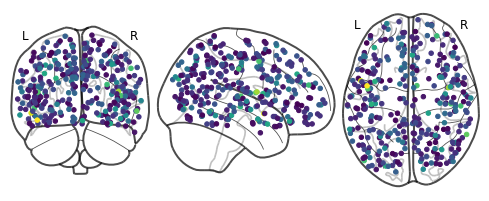

In [26]:
from nilearn import plotting
                                                #nodes 360 360 zero matrices, node coordinates in 3d (HCPfile)
                                                #only  use cortical so 330
                                                #

ZerosAdjacency=np.zeros([330,330])


plotting.plot_connectome(ZerosAdjacency,node_coords=CortRegions[:,-1,:],node_color=ToIndexTpotWeights,node_size=20,edge_cmap='coolwarm') 

In [ ]:
from nilearn.connectome import ConnectivityMeasure
correlation_measure = ConnectivityMeasure(kind='correlation')
correlation_matrix = correlation_measure.fit_transform([time_series])[0]

# Display the correlation matrix                              
import numpy as np
from nilearn import plotting
# Mask out the major diagonal
np.fill_diagonal(correlation_matrix, 0)
plotting.plot_matrix(correlation_matrix, labels=labels, colorbar=True,
                     vmax=0.8, vmin=-0.8)a

In [69]:
>>> node_coords = CortRegions[:,-1,:] 
>>> view = plotting.view_markers(
>>> node_coords,["blue", "red"],marker_size=5) 
>>> view


In [49]:
>>> from nilearn import plotting  
>>> dmn_coords = CortRegions[:,-1,:] 
>>> view = plotting.view_markers(dmn_coords, ['red', 'cyan', 'magenta', 'orange'], marker_size=5) 
>>> view

In [28]:
MI = pyreadr.read_r("maturational_index (2).RData")  
#MI is our variable 
#all the indicies are items in the list with in the rdata file
#

In [29]:
MI

OrderedDict([('mi',
                         mi
              0   -0.128570
              1   -0.533463
              2   -0.364160
              3   -0.324408
              4   -0.190633
              ..        ...
              341  0.634885
              342 -0.336877
              343  0.573060
              344 -0.269963
              345  0.047666
              
              [346 rows x 1 columns])])

In [75]:
MI.size



AttributeError: 'collections.OrderedDict' object has no attribute 'size'

In [ ]:
from matplotlib.lines import Line2D

legend_elements = []
for k,v in color_dict.items():
    legend_elements.append(Line2D([0], [0], marker='o', color=v, label=k,
                          markerfacecolor=v, markersize=5))
# Create the figure
fig, ax = plt.subplots()
ax.axis("off")
ax.legend(handles=legend_elements, loc='center')

In [2]:
import joblib

In [3]:
joblib.load("best_pipeline.joblib")

C:\Users\rbatr\anaconda4\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator SVR from version 0.23.1 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\rbatr\anaconda4\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator Pipeline from version 0.23.1 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


{'evaluated_individuals_': {'ExtraTreesRegressor(SVR(input_matrix, SVR__C=0.0625, SVR__epsilon=0.0001, SVR__kernel=rbf), ExtraTreesRegressor__bootstrap=True, ExtraTreesRegressor__max_features=0.55, ExtraTreesRegressor__min_samples_leaf=9, ExtraTreesRegressor__min_samples_split=6, ExtraTreesRegressor__n_estimators=100, ExtraTreesRegressor__random_state=42)': {'generation': 0,
   'mutation_count': 0,
   'crossover_count': 0,
   'predecessor': ('ROOT',),
   'operator_count': 2,
   'internal_cv_score': -2.2965656647968844},
  'LassoLarsCV(input_matrix, LassoLarsCV__normalize=False)': {'generation': 0,
   'mutation_count': 0,
   'crossover_count': 0,
   'predecessor': ('ROOT',),
   'operator_count': 1,
   'internal_cv_score': -2.1564412072422736},
  'Ridge(ElasticNetCV(input_matrix, ElasticNetCV__l1_ratio=0.05, ElasticNetCV__random_state=42, ElasticNetCV__tol=1e-05), Ridge__alpha=1.0, Ridge__random_state=42)': {'generation': 0,
   'mutation_count': 0,
   'crossover_count': 0,
   'predecesso

In [2]:
import pyreadr

In [9]:
weights_best_model10 = pd.read_csv("feature_importance10.csv", index_col = 0)

In [10]:
 weights_best_model10

feature    weight       std
0      x119  0.018005  0.003878
1      x127  0.017017  0.004528
2      x178  0.011743  0.005187
3      x292  0.010620  0.005348
4      x115  0.010461  0.002294
..      ...       ...       ...
341    x100 -0.001202  0.001744
342    x322 -0.001369  0.001299
343     x71 -0.001406  0.000721
344    x236 -0.001586  0.001475
345    x150 -0.002066  0.002610

[346 rows x 3 columns]

In [13]:
 weights_best_model10['weight']  #taking the weights of the nodes

0      0.018005
1      0.017017
2      0.011743
3      0.010620
4      0.010461
         ...   
341   -0.001202
342   -0.001369
343   -0.001406
344   -0.001586
345   -0.002066
Name: weight, Length: 346, dtype: float64

In [15]:
weightsarray10 = np.asarray(weights_best_model10["weight"])

In [18]:
test= weights_best_model10["feature"]
weights_int=np.zeros([346])
for i in range(0,346): 
    weights_int[i,]=int(test[i].lstrip('x'))

weights_sort_indices = (np.argsort(weights_int))

In [19]:
weights_indicies = weightsarray10 [weights_sort_indices]

In [20]:
weights = weightsarray10 [weights_sort_indices]

In [8]:
GeneralInfo = pyreadr.read_r('nspn.fmri.general.vars.RData')

GeneralInfo

HCPKeepID=GeneralInfo['hcp.keep.id']
HCPCort=GeneralInfo['hcp.346.cort']
CortRegionsAll=np.genfromtxt('HCP_2009c_asym_360_2mm_coords.txt',delimiter=" ")

ToIndexPositions=HCPKeepID[16:]-17  
CortRegions=CortRegionsAll[ToIndexPositions]

In [23]:
ToIndexTpotWeights=weights[HCPCort["hcp.346.cort"]-1]

C:\Users\rbatr\anaconda4\lib\site-packages\nilearn\plotting\displays.py:1766: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if node_color == 'auto':


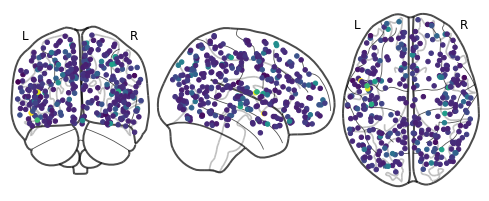

In [24]:

from nilearn import plotting
                                                #nodes 360 360 zero matrices, node coordinates in 3d (HCPfile)
                                                #only  use cortical so 330
                                                #

ZerosAdjacency=np.zeros([330,330])


plotting.plot_connectome(ZerosAdjacency,node_coords=CortRegions[:,-1,:],node_color=ToIndexTpotWeights,node_size=20,edge_cmap='coolwarm')

In [25]:
weights_best_model20 = pd.read_csv("feature_importance20.csv", index_col = 0)

In [26]:
weights_best_model20['weight']  #taking the weights of the nodes

0      0.025085
1      0.021064
2      0.019156
3      0.019045
4      0.017116
         ...   
341   -0.001239
342   -0.001272
343   -0.001494
344   -0.001621
345   -0.002521
Name: weight, Length: 346, dtype: float64

In [27]:
weightsarray20 = np.asarray(weights_best_model20["weight"])

In [28]:
test= weights_best_model20["feature"]
weights_int=np.zeros([346])
for i in range(0,346): 
    weights_int[i,]=int(test[i].lstrip('x'))


In [29]:
weights_sort_indices20 = (np.argsort(weights_int))

weights_indicies20 = weightsarray20 [weights_sort_indices]

weights20 = weightsarray20 [weights_sort_indices20]


In [32]:


HCPKeepID=GeneralInfo['hcp.keep.id']
HCPCort=GeneralInfo['hcp.346.cort']
CortRegionsAll=np.genfromtxt('HCP_2009c_asym_360_2mm_coords.txt',delimiter=" ")
ToIndexPositions=HCPKeepID[16:]-17  
CortRegions=CortRegionsAll[ToIndexPositions]

ToIndexTpotWeights20=weights20[HCPCort["hcp.346.cort"]-1]


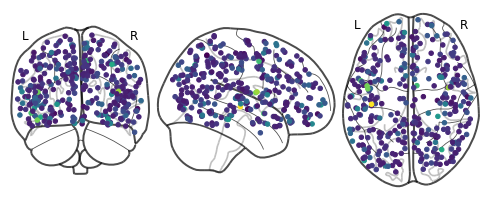

In [33]:
from nilearn import plotting
                                                #nodes 360 360 zero matrices, node coordinates in 3d (HCPfile)
                                                #only  use cortical so 330
                                                #

ZerosAdjacency=np.zeros([330,330])


plotting.plot_connectome(ZerosAdjacency,node_coords=CortRegions[:,-1,:],node_color=ToIndexTpotWeights20,node_size=20,edge_cmap='coolwarm')


In [3]:
weights_best_model30 = pd.read_csv("feature_importance30.csv", index_col = 0)
weights_best_model30['weight']  #taking the weights of the nodes
weightsarray30 = np.asarray(weights_best_model30["weight"])

In [4]:
test= weights_best_model30["feature"]
weights_int=np.zeros([346])
for i in range(0,346): 
    weights_int[i,]=int(test[i].lstrip('x'))


In [6]:
weights_sort_indices30 = (np.argsort(weights_int))

weights_indicies30 = weightsarray30 [weights_sort_indices30]

weights30 = weightsarray30 [weights_sort_indices30]


In [9]:
HCPKeepID=GeneralInfo['hcp.keep.id']
HCPCort=GeneralInfo['hcp.346.cort']
CortRegionsAll=np.genfromtxt('HCP_2009c_asym_360_2mm_coords.txt',delimiter=" ")
ToIndexPositions=HCPKeepID[16:]-17  
CortRegions=CortRegionsAll[ToIndexPositions]

ToIndexTpotWeights30=weights30[HCPCort["hcp.346.cort"]-1]

C:\Users\rbatr\anaconda4\lib\site-packages\nilearn\plotting\displays.py:1766: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if node_color == 'auto':


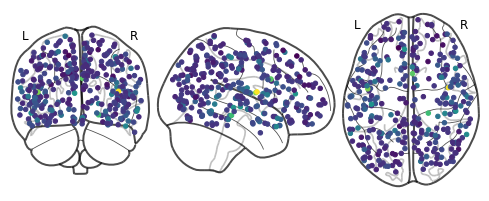

In [10]:
from nilearn import plotting
                                                #nodes 360 360 zero matrices, node coordinates in 3d (HCPfile)
                                                #only  use cortical so 330
                                                #

ZerosAdjacency=np.zeros([330,330])


plotting.plot_connectome(ZerosAdjacency,node_coords=CortRegions[:,-1,:],node_color=ToIndexTpotWeights30,node_size=20,edge_cmap='coolwarm')

In [12]:
weights_best_model40 = pd.read_csv("feature_importance40.csv", index_col = 0)
weights_best_model40['weight']  #taking the weights of the nodes
weightsarray40 = np.asarray(weights_best_model40["weight"])

test= weights_best_model40["feature"]
weights_int=np.zeros([346])
for i in range(0,346): 
    weights_int[i,]=int(test[i].lstrip('x'))
    
    
weights_sort_indices40 = (np.argsort(weights_int))

weights_indicies40 = weightsarray40 [weights_sort_indices40]

weights40 = weightsarray40 [weights_sort_indices40]


HCPKeepID=GeneralInfo['hcp.keep.id']
HCPCort=GeneralInfo['hcp.346.cort']
CortRegionsAll=np.genfromtxt('HCP_2009c_asym_360_2mm_coords.txt',delimiter=" ")
ToIndexPositions=HCPKeepID[16:]-17  
CortRegions=CortRegionsAll[ToIndexPositions]

ToIndexTpotWeights40=weights40[HCPCort["hcp.346.cort"]-1]


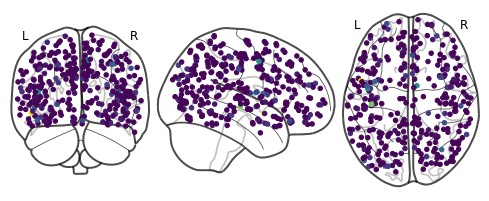

In [14]:
from nilearn import plotting
                                                #nodes 360 360 zero matrices, node coordinates in 3d (HCPfile)
                                                #only  use cortical so 330
                                                #

ZerosAdjacency=np.zeros([330,330])


plotting.plot_connectome(ZerosAdjacency,node_coords=CortRegions[:,-1,:],node_color=ToIndexTpotWeights40,node_size=20,edge_cmap='coolwarm')

In [15]:
weights_best_model50 = pd.read_csv("feature_importance50.csv", index_col = 0)
weights_best_model50['weight']  #taking the weights of the nodes
weightsarray50 = np.asarray(weights_best_model50["weight"])

test= weights_best_model50["feature"]
weights_int=np.zeros([346])
for i in range(0,346): 
    weights_int[i,]=int(test[i].lstrip('x'))
    
    
weights_sort_indices50 = (np.argsort(weights_int))

weights_indicies50 = weightsarray50 [weights_sort_indices50]

weights50 = weightsarray50 [weights_sort_indices50]


HCPKeepID=GeneralInfo['hcp.keep.id']
HCPCort=GeneralInfo['hcp.346.cort']
CortRegionsAll=np.genfromtxt('HCP_2009c_asym_360_2mm_coords.txt',delimiter=" ")
ToIndexPositions=HCPKeepID[16:]-17  
CortRegions=CortRegionsAll[ToIndexPositions]

ToIndexTpotWeights50=weights50[HCPCort["hcp.346.cort"]-1]


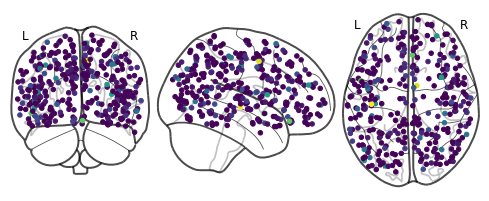

In [16]:
from nilearn import plotting
                                                #nodes 360 360 zero matrices, node coordinates in 3d (HCPfile)
                                                #only  use cortical so 330
                                                #

ZerosAdjacency=np.zeros([330,330])


plotting.plot_connectome(ZerosAdjacency,node_coords=CortRegions[:,-1,:],node_color=ToIndexTpotWeights50,node_size=20,edge_cmap='coolwarm')

In [17]:
weights_best_model60 = pd.read_csv("feature_importance60.csv", index_col = 0)
weights_best_model60['weight']  #taking the weights of the nodes
weightsarray60 = np.asarray(weights_best_model60["weight"])


weights_int=np.zeros([346])
for i in range(0,346): 
    weights_int[i,]=int(test[i].lstrip('x'))
    
    
weights_sort_indices60 = (np.argsort(weights_int))

weights_indicies60 = weightsarray60 [weights_sort_indices60]

weights60 = weightsarray60 [weights_sort_indices60]


HCPKeepID=GeneralInfo['hcp.keep.id']
HCPCort=GeneralInfo['hcp.346.cort']
CortRegionsAll=np.genfromtxt('HCP_2009c_asym_360_2mm_coords.txt',delimiter=" ")
ToIndexPositions=HCPKeepID[16:]-17  
CortRegions=CortRegionsAll[ToIndexPositions]

ToIndexTpotWeights60=weights60[HCPCort["hcp.346.cort"]-1]

In [20]:
weights_best_model50['weight']

0      0.133073
1      0.125700
2      0.100002
3      0.099855
4      0.074543
         ...   
341    0.000196
342    0.000195
343    0.000185
344    0.000173
345    0.000012
Name: weight, Length: 346, dtype: float64

In [19]:
weights_best_model60['weight']

0      0.133792
1      0.105990
2      0.102023
3      0.082466
4      0.080990
         ...   
341   -0.000215
342   -0.000218
343   -0.000225
344   -0.000228
345   -0.000342
Name: weight, Length: 346, dtype: float64

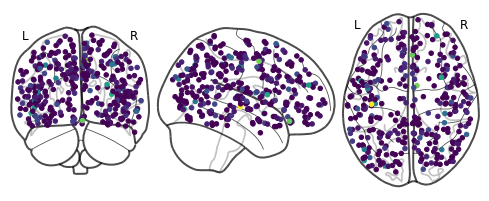

In [18]:
from nilearn import plotting
                                                #nodes 360 360 zero matrices, node coordinates in 3d (HCPfile)
                                                #only  use cortical so 330
                                                #

ZerosAdjacency=np.zeros([330,330])


plotting.plot_connectome(ZerosAdjacency,node_coords=CortRegions[:,-1,:],node_color=ToIndexTpotWeights60,node_size=20,edge_cmap='coolwarm')

In [21]:
weights_best_model70 = pd.read_csv("feature_importance70.csv", index_col = 0)
weights_best_model70['weight']  #taking the weights of the nodes
weightsarray70 = np.asarray(weights_best_model70["weight"])


weights_int=np.zeros([346])
for i in range(0,346): 
    weights_int[i,]=int(test[i].lstrip('x'))
    
    
weights_sort_indices70 = (np.argsort(weights_int))

weights_indicies70 = weightsarray70 [weights_sort_indices70]

weights70 = weightsarray70 [weights_sort_indices70]


HCPKeepID=GeneralInfo['hcp.keep.id']
HCPCort=GeneralInfo['hcp.346.cort']
CortRegionsAll=np.genfromtxt('HCP_2009c_asym_360_2mm_coords.txt',delimiter=" ")
ToIndexPositions=HCPKeepID[16:]-17  
CortRegions=CortRegionsAll[ToIndexPositions]

ToIndexTpotWeights70=weights70[HCPCort["hcp.346.cort"]-1]

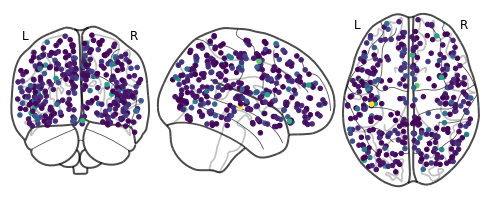

In [22]:
from nilearn import plotting
                                                #nodes 360 360 zero matrices, node coordinates in 3d (HCPfile)
                                                #only  use cortical so 330
                                                #

ZerosAdjacency=np.zeros([330,330])


plotting.plot_connectome(ZerosAdjacency,node_coords=CortRegions[:,-1,:],node_color=ToIndexTpotWeights70,node_size=20,edge_cmap='coolwarm')

In [23]:
weights_best_model80 = pd.read_csv("feature_importance80.csv", index_col = 0)
weights_best_model80['weight']  #taking the weights of the nodes
weightsarray80 = np.asarray(weights_best_model80["weight"])


weights_int=np.zeros([346])
for i in range(0,346): 
    weights_int[i,]=int(test[i].lstrip('x'))
    
    
weights_sort_indices80 = (np.argsort(weights_int))

weights_indicies80 = weightsarray80 [weights_sort_indices80]

weights80 = weightsarray80 [weights_sort_indices80]


HCPKeepID=GeneralInfo['hcp.keep.id']
HCPCort=GeneralInfo['hcp.346.cort']
CortRegionsAll=np.genfromtxt('HCP_2009c_asym_360_2mm_coords.txt',delimiter=" ")
ToIndexPositions=HCPKeepID[16:]-17  
CortRegions=CortRegionsAll[ToIndexPositions]

ToIndexTpotWeights80=weights80[HCPCort["hcp.346.cort"]-1]

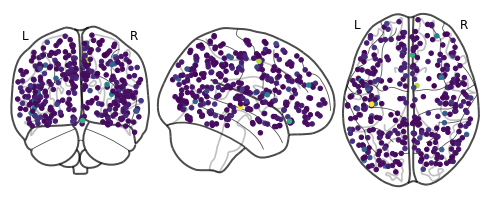

In [24]:
from nilearn import plotting
                                                #nodes 360 360 zero matrices, node coordinates in 3d (HCPfile)
                                                #only  use cortical so 330
                                                #

ZerosAdjacency=np.zeros([330,330])


plotting.plot_connectome(ZerosAdjacency,node_coords=CortRegions[:,-1,:],node_color=ToIndexTpotWeights80,node_size=20,edge_cmap='coolwarm')

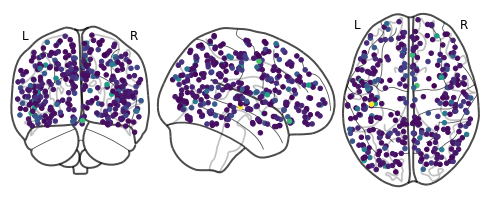

In [25]:
weights_best_model90 = pd.read_csv("feature_importance90.csv", index_col = 0)
weights_best_model90['weight']  #taking the weights of the nodes
weightsarray90 = np.asarray(weights_best_model90["weight"])


weights_int=np.zeros([346])
for i in range(0,346): 
    weights_int[i,]=int(test[i].lstrip('x'))
    
    
weights_sort_indices90 = (np.argsort(weights_int))

weights_indicies90 = weightsarray90 [weights_sort_indices90]

weights90 = weightsarray90 [weights_sort_indices90]


HCPKeepID=GeneralInfo['hcp.keep.id']
HCPCort=GeneralInfo['hcp.346.cort']
CortRegionsAll=np.genfromtxt('HCP_2009c_asym_360_2mm_coords.txt',delimiter=" ")
ToIndexPositions=HCPKeepID[16:]-17  
CortRegions=CortRegionsAll[ToIndexPositions]

ToIndexTpotWeights90=weights90[HCPCort["hcp.346.cort"]-1]

from nilearn import plotting
                                                #nodes 360 360 zero matrices, node coordinates in 3d (HCPfile)
                                                #only  use cortical so 330
                                                

ZerosAdjacency=np.zeros([330,330])


plotting.plot_connectome(ZerosAdjacency,node_coords=CortRegions[:,-1,:],node_color=ToIndexTpotWeights90,node_size=20,edge_cmap='coolwarm')

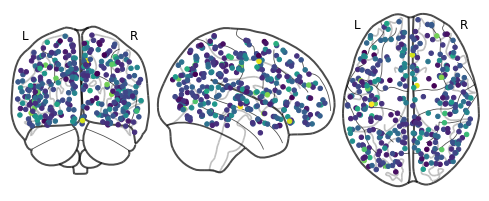

In [26]:
weights_best_model100 = pd.read_csv("feature_importance100.csv", index_col = 0)
weights_best_model100['weight']  #taking the weights of the nodes
weightsarray100 = np.asarray(weights_best_model100["weight"])


weights_int=np.zeros([346])
for i in range(0,346): 
    weights_int[i,]=int(test[i].lstrip('x'))
    
    
weights_sort_indices100 = (np.argsort(weights_int))

weights_indicies100 = weightsarray100 [weights_sort_indices100]

weights100 = weightsarray100 [weights_sort_indices100]


HCPKeepID=GeneralInfo['hcp.keep.id']
HCPCort=GeneralInfo['hcp.346.cort']
CortRegionsAll=np.genfromtxt('HCP_2009c_asym_360_2mm_coords.txt',delimiter=" ")
ToIndexPositions=HCPKeepID[16:]-17  
CortRegions=CortRegionsAll[ToIndexPositions]

ToIndexTpotWeights100=weights100[HCPCort["hcp.346.cort"]-1]

from nilearn import plotting
                                                #nodes 360 360 zero matrices, node coordinates in 3d (HCPfile)
                                                #only  use cortical so 330
                                                

ZerosAdjacency=np.zeros([330,330])


plotting.plot_connectome(ZerosAdjacency,node_coords=CortRegions[:,-1,:],node_color=ToIndexTpotWeights100,node_size=20,edge_cmap='coolwarm')

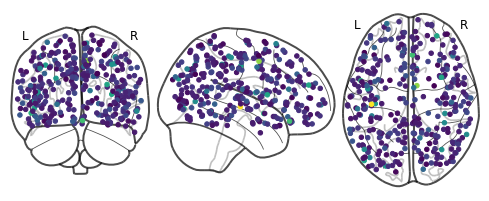

In [27]:
weights_best_model110 = pd.read_csv("feature_importance110.csv", index_col = 0)
weights_best_model110['weight']  #taking the weights of the nodes
weightsarray110 = np.asarray(weights_best_model110["weight"])


weights_int=np.zeros([346])
for i in range(0,346): 
    weights_int[i,]=int(test[i].lstrip('x'))
    
    
weights_sort_indices110 = (np.argsort(weights_int))

weights_indicies110 = weightsarray110 [weights_sort_indices110]

weights110 = weightsarray110 [weights_sort_indices110]


HCPKeepID=GeneralInfo['hcp.keep.id']
HCPCort=GeneralInfo['hcp.346.cort']
CortRegionsAll=np.genfromtxt('HCP_2009c_asym_360_2mm_coords.txt',delimiter=" ")
ToIndexPositions=HCPKeepID[16:]-17  
CortRegions=CortRegionsAll[ToIndexPositions]

ToIndexTpotWeights110=weights110[HCPCort["hcp.346.cort"]-1]

from nilearn import plotting
                                                #nodes 360 360 zero matrices, node coordinates in 3d (HCPfile)
                                                #only  use cortical so 330
                                                

ZerosAdjacency=np.zeros([330,330])


plotting.plot_connectome(ZerosAdjacency,node_coords=CortRegions[:,-1,:],node_color=ToIndexTpotWeights110,node_size=20,edge_cmap='coolwarm')